In [2]:
import pprint as pp
import sys
import os
import pymongo
from pymongo import MongoClient
from datetime import datetime
import ast
import pandas as pd


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
class Database:
    def __init__(self):
        # Read credentials from environment file.
        self.conn = MongoClient(
            host='my.ag.tools:27222',
            username='prod-r7',
            password='dfs2#sw!5wn3Tdks!',
            authSource='dbagtoolsplus'
        )



    def collection_volume_commodities(self):
        return self.conn.dbagtoolsplus.volume_commodities


In [7]:
# def do_something(commodity):
#     pass 
# def get_commodity_list(db):
    
#     commodity_list_query= [
#         { '$match': {
             
            
            
#             }

#         }
#     ]
#     db_conn=db.collection_volume_commodities()
#     result=list(db_conn.aggregate(commodity_list_query))  
#     return result

# db=Database()
# commodity_list=get_commodity_list(db)

# for commodity in commodity_list:
#     do_something(commodity)


In [ ]:
# response = list(conn.aggregate(query))
# pp.pprint(response)

In [ ]:
# bro_df=pd.DataFrame(commodity_list)

In [ ]:
# bro_df=pd.DataFrame(commodity_list)

In [8]:
def collection_volume_commodities(self):
        return self.conn.dbagtoolsplus.volume_commodities
db = Database()
conn = db.collection_volume_commodities()

query = [
    {
        '$match': {'commodity': 'broccoli', 'reportDate': datetime(2020, 7, 21)}
    }
]

response = list(conn.aggregate(query))
pp.pprint(response)


[]


In [9]:
db = Database()
conn = db.collection_volume_commodities()

query = [
    {
        '$match': {
            'commodity': 'broccoli', 
            'crawl_date': {'$gte': datetime(2020, 7, 21)}
        }
    }
]

response = list(conn.aggregate(query))
pp.pprint(response)

[]


In [18]:
# Get the Data
bro_df=pd.DataFrame(response)

In [19]:
# Check the head of the Data
bro_df.head(1)

Empty DataFrame
Columns: []
Index: []

In [236]:
# Info to describe methode
bro_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [237]:
# Statistics 
bro_df.describe()

ValueError: Cannot describe a DataFrame without columns

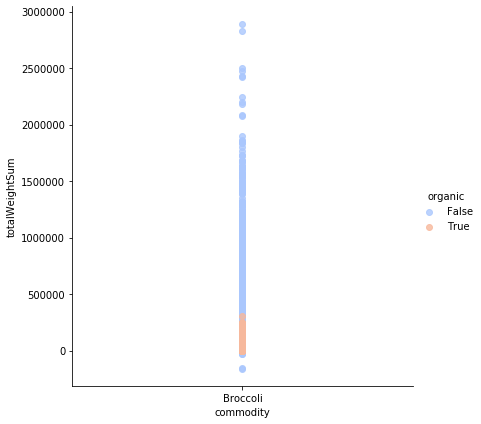

In [23]:
# EDA
# Create a scatterplot of carvanCount vs to totalWeightSum where the are colored by season
sns.lmplot(x='commodity', y='totalWeightSum', data=bro_df, hue='organic', fit_reg=False, palette='coolwarm',size=6,aspect=1)

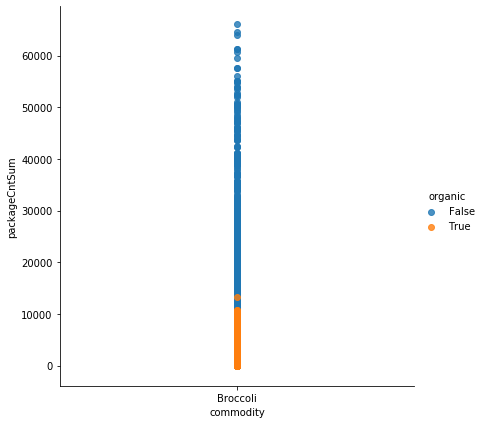

In [26]:
sns.lmplot(x='commodity', y='packageCntSum', data=bro_df, hue='organic', fit_reg=False,size=6,aspect=1)

C:\Users\bruno\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


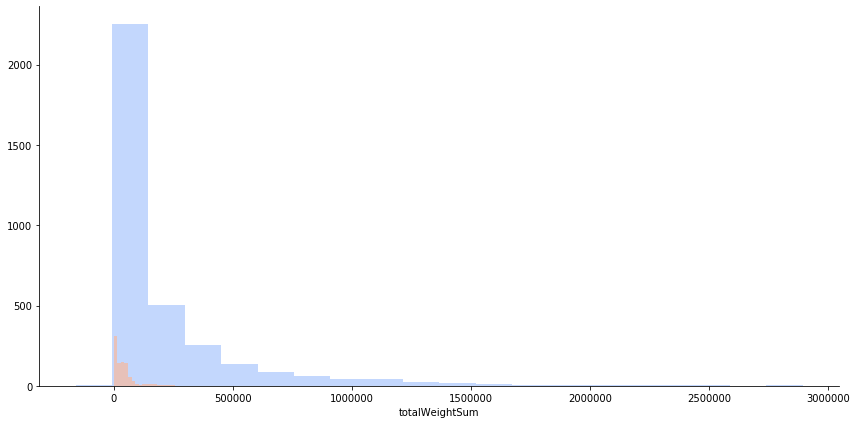

In [34]:
g=sns.FacetGrid(bro_df, hue='organic', palette='coolwarm',size=6, aspect=2)
g=g.map(plt.hist,'totalWeightSum', bins=20,alpha=0.7)

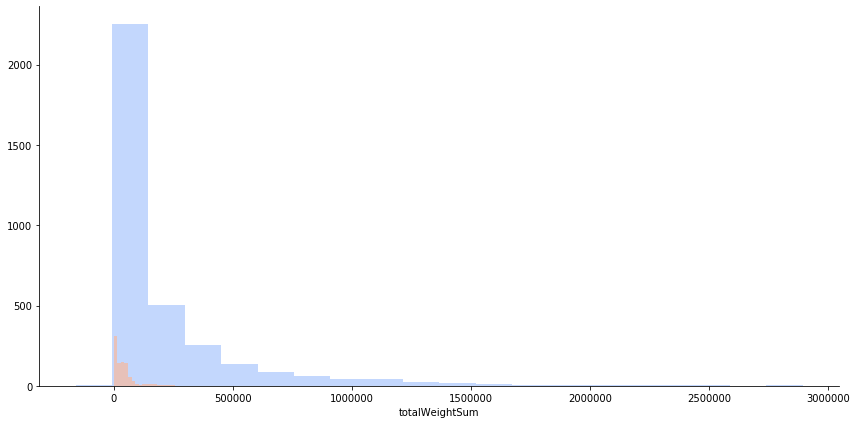

In [38]:
g=sns.FacetGrid(bro_df, hue='organic', palette='coolwarm',size=6, aspect=2)
g=g.map(plt.hist,'totalWeightSum', bins=20,alpha=0.7)

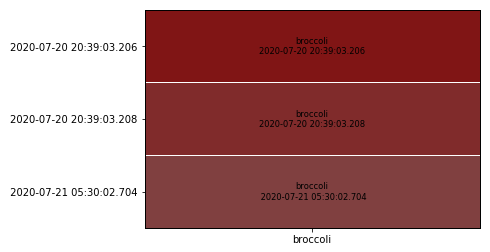

In [54]:
gender = [' 2020-07-21 05:30:02.704', '2020-07-20 20:39:03.208', '2020-07-20 20:39:03.206']
pet = ['broccoli', 'broccoli', 'broccoli']
data = pandas.DataFrame({'gender': gender, 'pet': pet})
mosaic(data, ['pet', 'gender'])
plt.show()

In [140]:
total=(bro_df.groupby('commodity')['totalWeightSum'].count().sort_values(ascending=False).reset_index(name='crawl_date'))

In [141]:
# bro_df.to_csv('C:/Users/bruno/Desktop/Data science for Business/broccoli_txt.csv')

In [142]:
bro_df.totalWeightSum.count()

4377

In [143]:
bro_df['start_time_datetime'] = pd.to_datetime(bro_df['crawl_date'])
bro_df['start_time_day_name']=bro_df.crawl_date.dt.day_name()
bro_df['start_time_hour']=bro_df.start_time_datetime.dt.hour
bro_df['duration_second']=bro_df.crawl_date.dt.second
bro_df['start_time_month']=bro_df.crawl_date.dt.month

In [144]:
result2 = pd.pivot_table(bro_df[['start_time_datetime', 'start_time_hour', 'duration_second','commodity']], index=['commodity'], aggfunc='count')

In [145]:
# result=hmap.pivot(index='commodity',columns='crawl_date',values='totalWeightSum')
# Unstack below puts days on the x-axis and hour of day on the y-axis.
result3 = result2.unstack(level=0)

In [146]:
morning_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + "am"
    morning_hours.append(detailed_hour)

In [147]:
afternoon_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + "pm"
    afternoon_hours.append(detailed_hour)

In [148]:
detailed_hours = ["12am"] + morning_hours + ["12pm"] + afternoon_hours

In [149]:
list_commodity = ['Strawberries']

In [150]:
# sns.set_context("talk")
# f, ax = plt.subplots(figsize=(10, 10))
# ax = sns.heatmap(result3, annot=True, linewidths=1, ax=ax, xticklabels=list_commodity, yticklabels=detailed_hours,cmap='winter_r')
# ax.axes.set_title("Heatmap Counts by Day and Hour of Day", fontsize=24, y=1.01)
# ax.set(xlabel='commodity', ylabel='Starting Hour');
# f,ax=plt.subplots(figsize=(20,20))
# sns.heatmap(result,annot=True,linewidths=1.1, cmap='summer',fmt="")

In [151]:
bro_df.head(1)

_id          originName  carVanCount  totalWeightSum  \
0  5f16dfca04c6e671a091b24a  CALIFORNIA-CENTRAL          3.0          132000   

          districtName  season  transmode impExpFlag commodity  organic  ...  \
0  SALINAS-WATSONVILLE    2020  Piggyback          D  Broccoli    False  ...   

  pdwInd pdwDate packageDesc packageCntSum varietyName  \
0    NaN     NaT         NaN           NaN         NaN   

      start_time_datetime  start_time_day_name start_time_hour  \
0 2020-07-21 05:30:02.704              Tuesday               5   

  duration_second start_time_month  
0               2                7  

[1 rows x 23 columns]

In [152]:
len(bro_df.columns)

23

In [153]:
# Selecting method by different method
data=bro_df[['totalWeightSum','start_time_month','start_time_hour']]

In [154]:
data

totalWeightSum  start_time_month  start_time_hour
0             132000                 7                5
1               6666                 7               20
2            1160120                 7               20
3             172579                 7               20
4              48776                 7               20
...              ...               ...              ...
4372           49128                 7                1
4373              40                 7                1
4374          138880                 7                1
4375           69120                 7                1
4376           35160                 7                1

[4377 rows x 3 columns]

In [155]:
phase_1=data.groupby(['start_time_month','start_time_hour']).mean()

In [156]:
phase_1.head(10)

totalWeightSum
start_time_month start_time_hour                
7                1                 165184.838701
                 5                 132000.000000
                 20                218737.822171

In [157]:
phase_1=phase_1.reset_index()
phase_1.head()

start_time_month  start_time_hour  totalWeightSum
0                 7                1   165184.838701
1                 7                5   132000.000000
2                 7               20   218737.822171

In [158]:
phase_1.pivot('start_time_month','start_time_hour','totalWeightSum').head()

start_time_hour              1         5              20
start_time_month                                        
7                 165184.838701  132000.0  218737.822171

In [159]:
phase_1.pivot('start_time_month','start_time_hour')['totalWeightSum'].head()

start_time_hour              1         5              20
start_time_month                                        
7                 165184.838701  132000.0  218737.822171

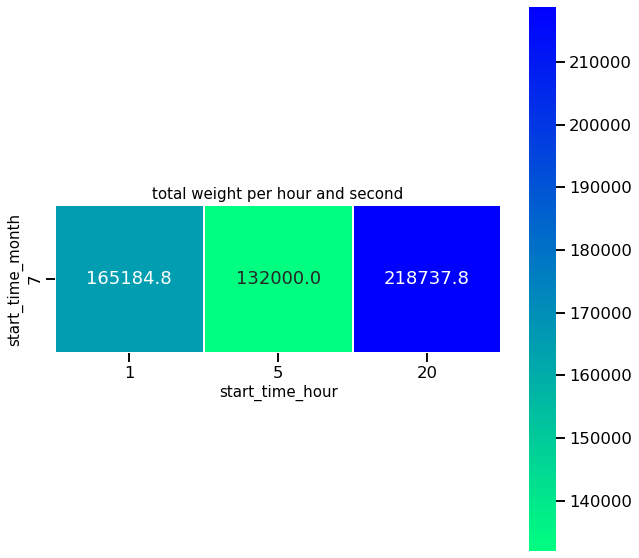

In [170]:
plt.figure(figsize=(10,10))
pivot_table=phase_1.pivot('start_time_month','start_time_hour','totalWeightSum')
plt.xlabel('start_time_hour', size=15)
plt.ylabel('start_time_month', size=15)
plt.title('total weight per hour and second', size=15)
sns.heatmap(pivot_table, annot=True, fmt='.1f', linewidths=1, square=True, cmap='winter_r')

In [173]:
bro_df=pd.DataFrame(response)

In [174]:
bro_df.head()

_id          originName  totalWeightSum  \
0  5f17504b04c6e659f133f31c              MEXICO           22176   
1  5f17504b04c6e659f133f31b              MEXICO           24411   
2  5f17504b04c6e659f133f31d              MEXICO            6519   
3  5f17504b04c6e659f133f246  CALIFORNIA-CENTRAL           73800   
4  5f17504b04c6e659f133f244  CALIFORNIA-CENTRAL          558475   

                          districtName  season transmode impExpFlag  \
0    MEXICO CROSSINGS THROUGH ROMA, TX    2019     Truck          I   
1   MEXICO CROSSINGS THROUGH PHARR, TX    2019     Truck          I   
2  MEXICO CROSSINGS THROUGH LAREDO, TX    2019     Truck          I   
3                          SANTA MARIA    2020     Truck          D   
4                          SANTA MARIA    2020     Truck          D   

     commodity  organic reportDate  \
0  Cauliflower    False 2020-07-20   
1  Cauliflower    False 2020-07-20   
2  Cauliflower    False 2020-07-20   
3  Cauliflower     True 2020-07-20   
4  Cauliflower    False 2020-07-20   

                                     checksum_sha256              crawl_date  \
0  ef90871a280cb2db5125947c8bc14f38398bd1783fc270... 2020-07-21 13:30:03.656   
1  712f9fc022ff669c008b653ccabbd70b325c7434389eee... 2020-07-21 13:30:03.654   
2  9d723657835ca6f614b7c9cbfd5fc008d9b32e8051a293... 2020-07-21 13:30:03.658   
3  e1cb33af1e69590cbfa92727e08f381ad14a8238ee1c2b... 2020-07-21 13:30:03.155   
4  38934ed073fe0e505625e9c172a2974baf7cc30f38b46f... 2020-07-21 13:30:03.149   

     packageDesc  packageCntSum  carVanCount pdwInd pdwDate  
0            NaN            NaN          NaN    NaN     NaT  
1            NaN            NaN          NaN    NaN     NaT  
2            NaN            NaN          NaN    NaN     NaT  
3  CTNS FLM WRPD         2952.0          NaN    NaN     NaT  
4  CTNS FLM WRPD        22339.0          NaN    NaN     NaT

In [10]:
def do_something(commodity):
    pass 
def get_commodity_list(db):
    
    commodity_list_query= [
        { '$match': {
             
            
            
            }

        }
    ]
    db_conn=db.collection_volume_commodities()
    result=list(db_conn.aggregate(commodity_list_query))  
    return result

db=Database()
commodity_list=get_commodity_list(db)

for commodity in commodity_list:
    do_something(commodity)


CursorNotFound: cursor id 8227490069466466438 not found

In [40]:
response = list(conn.aggregate(query))
pp.pprint(response)

[]


In [ ]:
bro_df=pd.DataFrame(commodity_list)

In [42]:
bro_df.head()

_id originName                packageDesc  \
0  5f15540c8f20cd2595f6a179    ARIZONA  1 3/4 BUCRTS & 50 LB CTNS   
1  5f15540c8f20cd2595f6a17a    ARIZONA  1 3/4 BUCRTS & 50 LB CTNS   
2  5f15540c8f20cd2595f6a17b    ARIZONA  1 3/4 BUCRTS & 50 LB CTNS   
3  5f15540c8f20cd2595f6a17c    ARIZONA                 50 LB CTNS   
4  5f15540c8f20cd2595f6a17d    ARIZONA                       CTNS   

        varietyName  packageCntSum  totalWeightSum     districtName  season  \
0  ROUND GREEN TYPE          411.0           20565  WESTERN ARIZONA    2019   
1  ROUND GREEN TYPE          208.0           10418  WESTERN ARIZONA    2019   
2          RED TYPE          577.0           28860  WESTERN ARIZONA    2019   
3             NAPPA           12.0             614  WESTERN ARIZONA    2019   
4               NaN           15.0             376  WESTERN ARIZONA    2019   

  transmode impExpFlag        commodity  organic reportDate  \
0     Truck          D          Cabbage    False 2020-01-01   
1     Truck          D          Cabbage     True 2020-01-01   
2     Truck          D          Cabbage    False 2020-01-01   
3     Truck          D  Chinese cabbage    False 2020-01-01   
4     Truck          D           Endive    False 2020-01-01   

                                     checksum_sha256              crawl_date  \
0  0a37289a7ce5d06d665d4200b18f6b43c33ab0ac9618ca... 2020-07-20 01:21:32.161   
1  4251762434ff7ca59ac9d7d50ad17e29183a170e61085a... 2020-07-20 01:21:32.164   
2  3bf9681421fe2945b5db869d32cd4d63465c7a5272587e... 2020-07-20 01:21:32.166   
3  2bd08540f98f38037cfc862a11aa4d60ddb1fc65d0772a... 2020-07-20 01:21:32.168   
4  c7edc43e927e7d9a09cf9cc3ba31ce55cbe3c9e607e56f... 2020-07-20 01:21:32.169   

   carVanCount pdwInd pdwDate envDesc  
0          NaN    NaN     NaT     NaN  
1          NaN    NaN     NaT     NaN  
2          NaN    NaN     NaT     NaN  
3          NaN    NaN     NaT     NaN  
4          NaN    NaN     NaT     NaN